# HW08: Spectral Clustering
## Sina Dadmand
### December 29, 2021

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial as spa

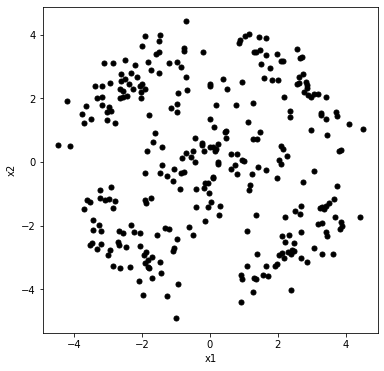

In [12]:
X = np.genfromtxt("hw08_data_set.csv", delimiter=",", skip_header=False)  # data points extracted from the csv file

N = X.shape[0]  # N samples
K = 5  # K clusters
threshold = 1.25
R = 5


# data points plotted
plt.figure(figsize=(6, 6))
plt.plot(X[:, 0], X[:, 1], '.', markersize=10, color="black")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

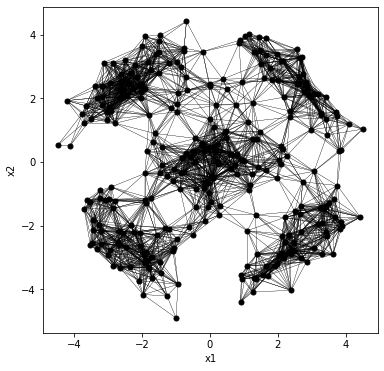

In [15]:
# calculate distances between pairs of data points
distances = np.zeros((N, N))
B = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        distances[i][j] = np.sqrt((X[j][0] - X[i][0]) ** 2 + (X[j][1] - X[i][1]) ** 2)  # euclidean distance
        if distances[i][j] > threshold or distances[i][j] == 0:
            B[i][j] = 0  # if the distance is above the threshold, B_ij = 0
        else:
            B[i][j] = 1  # otherwise, B_ij = 1

# plot connectivity matrix
plt.figure(figsize=(6, 6))
plt.plot(X[:, 0], X[:, 1], '.', markersize=10, color="black")
for i in range(N):
    for j in range(N):
        if B[i][j] == 1:
            plt.plot([X[i][0], X[j][0]], [X[i][1], X[j][1]], "k", linewidth=0.2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [5]:
# calculate D
D = np.zeros((N, N))
for i in range(N):
    b_count = 0  
    for j in range(N):
        if B[i][j] == 1:
            #if b is one it will increase the count
            b_count += 1  
    D[i][i] = b_count

In [6]:
# calculate the symmetric laplacian matrix according to the formula
I = np.eye(N, dtype=int)
L_symmetric = I - np.matmul(np.sqrt(np.linalg.inv(D)), np.matmul(B, np.sqrt(np.linalg.inv(D))))
#Extract and sort eigen values then take the first R=5 values
L_eigenvalues, L_eigenvectors = np.linalg.eig(L_symmetric) 
eigenvalues_sorted = L_eigenvalues.argsort()
smallest_eigenvectors = L_eigenvectors[:, eigenvalues_sorted]
smallest_eigenvectors = smallest_eigenvectors[:R]
Z = np.transpose(smallest_eigenvectors)
initial_centroids = np.vstack([Z[29], Z[143], Z[204], Z[271], Z[277]])



In [23]:
def update_centroids(memberships, X):
    if memberships is None:
        # initialize centroids
        centroids = X[np.random.choice(range(N), K),:]
    else:
        # update centroids
        centroids = np.vstack([np.mean(X[memberships == k,], axis = 0) for k in range(K)])
    return(centroids)

def update_memberships(centroids, X):
    # calculate distances between centroids and data points
    D = spa.distance_matrix(centroids, X)
    # find the nearest centroid for each data point
    memberships = np.argmin(D, axis = 0)
    return(memberships)

def plot_current_state(centroids, memberships, X):
    cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"])
    if memberships is None:
        plt.plot(X[:,0], X[:,1], ".", markersize = 10, color = "black")
    else:
        for c in range(K):
            plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10, 
                     color = cluster_colors[c])
    for c in range(K):
        plt.plot(centroids[c, 0], centroids[c, 1], "s", markersize = 12, 
                 markerfacecolor = cluster_colors[c], markeredgecolor = "black")
    plt.xlabel("x1")
    plt.ylabel("x2")
    

In [ ]:
#k means clustering
centroids = None
memberships = None
iteration = 1
while True:
    print("Iteration#{}:".format(iteration))
    
    old_centroids = centroids
    centroids = update_centroids(memberships, X)
    if np.alltrue(centroids == old_centroids):
        break
    else:
        plt.figure(figsize = (12, 6))    
        plt.subplot(1, 2, 1)
        plot_current_state(centroids, memberships, X)

    old_memberships = memberships
    memberships = update_memberships(centroids, X)
    if np.alltrue(memberships == old_memberships):
        plt.show()
        break
    else:
        plt.subplot(1, 2, 2)
        plot_current_state(centroids, memberships, X)
        plt.show()

    iteration = iteration + 1